<a href="https://colab.research.google.com/github/dys0602/Colab/blob/main/Ch4_1_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**럭키백의 확률**

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species'])) #unique() : 해당 열에서 고유한 값 추출

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler 
#표준화 전처리
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

###**k-최근접 이웃 분류기의 확률 예측**

*   다중 분류 : 타깃 데이터에 2개 이상의 클래스가 포함된 문제



In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [13]:
print(kn.classes_) #정렬된 7개의 타깃값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [14]:
print(kn.predict(test_scaled[:5])) #테스트 세트에서 처음 5개 샘플의 타깃값 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [15]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #각 클래스[bream, parkki,...]에 대한 확률
print(np.round(proba, decimals=4)) #소수점 아래 4번째 자리까지 표시(매개변수 decimals 이용)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [16]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes]) #타깃의 이웃은 3번째 클래스인 perch 2개(확률 0.6667), 5번째 클래스인 Roach 1개(확률 0.3333) 

[['Roach' 'Perch' 'Perch']]


###**로지스틱 회귀**
- 이름은 회귀이지만 **분류 모델**
- 알고리즘은 선형 회귀와 동일하게 선형 방정식 학습

> $z = a(weight) + b(length) + c(diamond) + d(height) + e(width) + f$
- z가 확률이 되기 위해선 0~1 사이 값이 되어야 함
- z가 아주 큰 음수->0, 아주 큰 양수->1로 바꾸는 함수 : **시그모이드 함수(로지스틱 함수)**

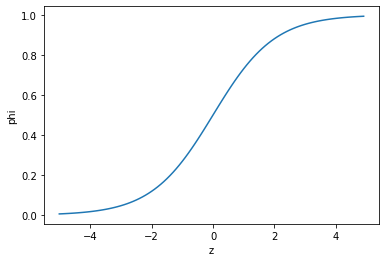

In [18]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [20]:
#불리언 인덱싱 : 넘파이 배열에서 True, False 값을 전달하여 행을 선택 ex) A~E 5개의 원소인 배열에서 A, C만 골라내기
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [21]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') #도미와 빙어일 경우에만 True, 나머지는 False
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [25]:
print(lr.predict_proba(train_bream_smelt[:5])) #샘플마다 2개의 확률 출력, 첫 번째가 음성 클래스(0)에 대한 확률과 두 번째가 양성 클래스(1)에 대한 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [26]:
print(lr.classes_)

['Bream' 'Smelt']


In [27]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


$z = -0.404(weight) -0.576(length) -0.663(diamond) + 1.013(height) -0.732(width) -2.161$

In [28]:
decisions = lr.decision_function(train_bream_smelt[:5]) #decision_function() 메서드를 통해 z값 계산
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [29]:
#expit() : decisions 배열의 값을 확률로 변환
from scipy.special import expit
print(expit(decisions)) #predict_proba() 메서드 출력의 두 번째 열과 같은 값, 즉 양성 클래스에 대한 z값 반환

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


**로지스틱 회귀로 다중 분류 수행하기**

In [30]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target)) #과대적합, 과소적합이 아닌 것 같음

0.9327731092436975
0.925


In [31]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [32]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) #7개 생선에 대한 확률을 계산했으므로 7개의 열, 5개의 샘플에 대한 예측이므로 5개의 행

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [33]:
print(lr.classes_) #각 열마다 양성 클래스, 첫 번째 샘플은 Perch를 가장 높은 확률로 예측

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [34]:
print(lr.coef_.shape, lr.intercept_.shape) #z를 7개나 계산 -> 다중분류는 x값을 하나씩 계산, 가장 높은 z값을 출력하는 클래스가 예측 클래스가 됨

(7, 5) (7,)


**소프트맥스 함수** : 하나의 선형 방정식의 출력값을 0과 1 사이로 압축하는 시그모이드 함수와 달리 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만듬. 지수 함수를 사용하기 때문에 정규화된 지수 함수라고 함

In [36]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2)) #테스트 세트의 처음 5개 샘플에 대한 z1~z7의 값

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [37]:
from scipy.special import softmax

proba = softmax(decision, axis=1) #소프트맥스 함수를 사용해 확률로 바꾸기, axis 매개변수는 소프트맥스를 계산한 축을 지정, 1이면 각 행, 각 샘플에 대해 소프트맥스를 계산
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
